<a href="https://colab.research.google.com/github/VivekRaj2005/Prerequisite-Test---ES-335/blob/main/Prerequisite_Test_ES_335.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
**How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and b (k, m) matrix? Explain.**

*Ans:* &nbsp;
Given the following \\
- A is a matrix of (n, k)
- B is a matrix of (k, m)

Lets assume the calculation of just one cell of the resultant matrix C ,
<br />
C<sub>ef</sub> = Σ A<sub>ei</sub> × B<sub>if</sub>
<br />
<br />
Here we can see that per cell we had a `k` multiplications.
<br />
Now to find the number of sigma functions we will look at the python code for summation (Σ) for a simple List A (Hidden) of length k
<br />
```python
summation = a[0]
for x in range(1, len(summation)):
  summation += a[x]
```

Hence we can see that number of iterations is `k - 1`
<br />
<br />
Now this has to continue for all the C <sub>(n, m)</sub> &nbsp; cells in the new product matrix.
<br />
This is the final conclusion:
- Number of cells in C<sub>(n, m)</sub> &nbsp; (Say N) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= n × m
- Number of additions for calculating C &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= N × (k - 1)
<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; = nm(k-1)
<br />
- Number of multiplications for calculating C = N × k
<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; = Nmk



# Question 2
**Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

*Ans:*
<br />
Since no constraints are given, we will assume the following and generate random test cases:

-  1 ≤ n, k, m ≤ 10
-  0 ≤ A<sub>ij</sub>, B<sub>ij</sub> ≤ 9

This is selected for easy visualisation.
<br />
We can do a bigger array witout the visualisation for timing purpouses

<br />

### **Test Case Generation**

The following code will generate the test case automatically:




In [3]:
import random
import numpy as np
from typing import Tuple

def GenerateTestCase(matrixLimits: Tuple[int] = (1, 10), numLimits: Tuple[int] = (0, 9)):
  n = random.randint(matrixLimits[0], matrixLimits[1])
  k = random.randint(matrixLimits[0], matrixLimits[1])
  m = random.randint(matrixLimits[0], matrixLimits[1])

  A = [[random.randint(numLimits[0], numLimits[1]) for _ in range(k)] for _ in range(n)]
  B = [[random.randint(numLimits[0], numLimits[1]) for _ in range(m)] for _ in range(k)]

  A_np = np.array(A)
  B_np = np.array(B)

  return A, B, A_np, B_np, n, k, m

### **Test Case Initialisation**

The following code will generate the test case and print them:

In [4]:
from tabulate import tabulate

# Check if prerequisite cell(s) has run
if not ('GenerateTestCase' in globals() and callable(globals()['GenerateTestCase'])):
  raise RuntimeError("Please Run Test Case Generation Cell first")

# Generate Test Case
A, B, A_np, B_np, n, k, m = GenerateTestCase()

# Print Test Case
print("Generated N:", n)
print("Generated M:", m)
print("Generated K:", k)

print("", end="\n\n")
print(f"Generated A ({n},{k}):")
print(tabulate(A, tablefmt="grid"))
print("", end="\n\n")
print(f"Generated B ({k},{m}):")
print(tabulate(B, tablefmt="grid"))



Generated N: 4
Generated M: 7
Generated K: 5


Generated A (4,5):
+---+---+---+---+---+
| 9 | 0 | 0 | 2 | 7 |
+---+---+---+---+---+
| 6 | 1 | 2 | 6 | 2 |
+---+---+---+---+---+
| 2 | 8 | 6 | 2 | 6 |
+---+---+---+---+---+
| 0 | 3 | 3 | 5 | 5 |
+---+---+---+---+---+


Generated B (5,7):
+---+---+---+---+---+---+---+
| 2 | 5 | 6 | 1 | 6 | 1 | 6 |
+---+---+---+---+---+---+---+
| 4 | 7 | 4 | 4 | 1 | 2 | 3 |
+---+---+---+---+---+---+---+
| 6 | 7 | 9 | 5 | 1 | 3 | 2 |
+---+---+---+---+---+---+---+
| 7 | 6 | 4 | 1 | 0 | 3 | 4 |
+---+---+---+---+---+---+---+
| 2 | 4 | 6 | 6 | 7 | 2 | 6 |
+---+---+---+---+---+---+---+


### **Using List Implementation**

The following function will try to  multiply the matrixes using `List`

In [6]:
from typing import List

def MultipyList(A:List[List[int]], B:List[List[int]], n: int, k: int, m: int):
  C = []
  for x in range(n):
    C.append([])
    for y in range(m):
      C[-1].append(0)
      for z in range(k):
        C[-1][-1] += A[x][z] * B[z][y]
  return C

### **Run Test Case for List**

The following code will try to use the `MultipyList` function and multiply the matrixes using `List`

In [7]:
from typing import List
from tabulate import tabulate

# Check if prerequisite cell(s) has run
g = globals()
if not all(elem in g for elem in ["A", "B", "n", "k", "m"]):
  raise RuntimeError("Please Run Test Case Initialisation first")

if not all(elem in g for elem in ["MultipyList"]):
  raise RuntimeError("Please Run Using List Implementation first")

print(f"Computed C ({m},{n}):")
print(tabulate(MultipyList(A, B, n, k, m), tablefmt="grid"))


Computed C (7,4):
+----+-----+-----+-----+-----+----+-----+
| 46 |  85 | 104 |  53 | 103 | 29 | 104 |
+----+-----+-----+-----+-----+----+-----+
| 74 |  95 |  94 |  38 |  53 | 36 |  79 |
+----+-----+-----+-----+-----+----+-----+
| 98 | 144 | 142 | 102 |  68 | 54 |  92 |
+----+-----+-----+-----+-----+----+-----+
| 75 |  92 |  89 |  62 |  41 | 40 |  65 |
+----+-----+-----+-----+-----+----+-----+


### **Using `Numpy` Implementation**

The following code will multiply the matrixes using numpys in-built `@` operation

In [8]:
from typing import List
from tabulate import tabulate

g = globals()
if not all(elem in g for elem in ["A_np", "B_np", "m", "n"]):
  raise RuntimeError("Please Test Case Initialisation first")

print(f"Computed C ({m},{n}):")
print(tabulate((A_np @ B_np).tolist(), tablefmt="grid"))



Computed C (7,4):
+----+-----+-----+-----+-----+----+-----+
| 46 |  85 | 104 |  53 | 103 | 29 | 104 |
+----+-----+-----+-----+-----+----+-----+
| 74 |  95 |  94 |  38 |  53 | 36 |  79 |
+----+-----+-----+-----+-----+----+-----+
| 98 | 144 | 142 | 102 |  68 | 54 |  92 |
+----+-----+-----+-----+-----+----+-----+
| 75 |  92 |  89 |  62 |  41 | 40 |  65 |
+----+-----+-----+-----+-----+----+-----+


### **Timing**

We can generate a bigger array for seeing a better Δ in timing. The updated constraints are given below.

-  10 ≤ n, k, m ≤ 500
-  100 ≤ A<sub>ij</sub>, B<sub>ij</sub> ≤ 2000

In [9]:
import timeit
import time

# Check if prerequisite cells are run first
g = globals()
if not all(elem in g for elem in ["GenerateTestCase"]):
  raise RuntimeError("Please Run Test Case Generation Cell first")

if not all(elem in g for elem in ["MultipyList"]):
  raise RuntimeError("Please Run Using List Implementation first")

# Test Case Generation:
A, B, A_np, B_np, n, k, m = GenerateTestCase(matrixLimits=(10, 500), numLimits=(100, 2000))
# Print Test Case
print("Generated N:", n)
print("Generated M:", m)
print("Generated K:", k)


# Compute Delta for List Implementation
delta_list = timeit.timeit(lambda: MultipyList(A, B, n, k, m), number=5)

# Compute Delta for Numpy Implementation
delta_numpy = timeit.timeit(lambda: (A_np @ B_np).tolist(), number=5)

print("\n")
# Print Delta
print("#"* 25 + " Summary " + "#"* 25)
print(f"Delta for List Implementation: {delta_list}")
print(f"Delta for Numpy Implementation: {delta_numpy}")
print("#" * (50 + len(" Summary ")))



Generated N: 16
Generated M: 227
Generated K: 76


######################### Summary #########################
Delta for List Implementation: 0.2454090470000665
Delta for Numpy Implementation: 0.0028743740001573315
###########################################################


### **Conclusion**

We can see that the time taken for the Python `List` is **much more** than the time taken for `Numpy`.
<br />
So in simple conclusion, **Numpy is faster**
<br />
<br />
This because of a few reasons:

1. **Parllelisation**: The NumPy package breaks down a task into multiple fragments and then processes all the fragments parallelly.
2. **Faster and Complied Binary**: The NumPy package integrates C, C++, and Fortran codes in Python. These programming languages have very little execution time compared to Python.
3. **Optimised Code**: The NumPy's `@` operation has a better time complexity than the one implemented by me.
4. **Memmory Blocks**: NumPy will freeze a continous block of array using `malloc()`. But python references multiple fragmented blocks of data with reference pointors. Which makes it slower than NumPy.

<br />
<i>Credits: GeeksForGeeks (Points: 1,2 and 4)</i>



# Question 3

<i>PS: The question has been broken down into 3 different cells under the same subsection</i>


**Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array?**

<br />

### **Genertate Test Case**
As no test case is given we shall assume a sample test case.
<br />
The following function will generate a list with the following constraints:
- 1 ≤ len(A) ≤ 10
- 0 ≤ A<sub>ij</sub> ≤ 9

In [10]:
import random
from typing import Tuple

def GenerateTestCaseQ3(matrixLimits: Tuple[int] = (1, 10), numLimits: Tuple[int] = (0, 9)):
  n = random.randint(matrixLimits[0], matrixLimits[1])
  myList = [random.randint(numLimits[0], numLimits[1]) for _ in range(n)]
  return myList, n

### **Calculate Median**

We will make  function to calculate median using the above said method

In [11]:
from typing import List

def Median(array: List[int], n :int):
  k = n // 2
  passCurrent = array.copy()

  for i in range(k):
    min_val = max(passCurrent)
    passCurrent.remove(min_val)

  # Odd Test Case
  if n % 2 == 1:
      return max(passCurrent)

  # Even Test Case
  else:
      min1 = min(passCurrent)
      passCurrent.remove(min1)
      min2 = min(passCurrent)
      return (min1 + min2) / 2

Here in each pass there will a removal of the maximum element. We will have to repeat this n/2 times to get the median.

<br />

#### **Time complexity**
- Removal of an element using `.remove()` = O(n)
- Calculation of `max(array)` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= O(n)
- Total Time Complexity in One Pass &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= 2 × O(n)
<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= O(n)
- Total Time Complexity of the Function &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; = k × O(n) + O(n)
<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= [n/2]O(n) + O(n)
<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= O(n<sup>2</sup>)

### **Running the Test Case**

In [12]:
g = globals()
if not all(elem in g for elem in ["GenerateTestCaseQ3"]):
  raise RuntimeError("Please Run Genertate Test Case first")

if not all(elem in g for elem in ["Median"]):
  raise RuntimeError("Please Run Calculate Median first")

array, n = GenerateTestCaseQ3()
median = Median(array, n)
print("Generated List:", array)
print(f"Median: {median}")

Generated List: [9, 1, 6, 2, 8]
Median: 6


 **Can you suggest a better method?**

 *Ans:* **Sorting**
 <br />
 In Built sorting takes O(nlogn) to complete and we can then easilly index the (n/2)<sup>th</sup> term as its median which is O(1). So in total it take O(nlogn) to complete


### **Median using Sort**

We will now make a function which sort and select to calculate the median

In [13]:
from typing import List

def MedianFaster(array: List[int], k: int):
    array.sort()
    if k % 2 == 1:
        return array[k // 2]
    else:
        return (array[k // 2 - 1] + array[k // 2]) / 2

### **Testing the Median Function**

Lets use the test generator to test the above wrapper function

In [14]:
g = globals()
if not all(elem in g for elem in ["GenerateTestCaseQ3"]):
  raise RuntimeError("Please Run Genertate Test Case first")

if not all(elem in g for elem in ["MedianFaster"]):
  raise RuntimeError("Please Run Median using Sort first")

array, n = GenerateTestCaseQ3()
print("Generated List:", array)
median = MedianFaster(array, n)
print(f"Median: {median}")



Generated List: [7, 5, 0, 6, 5, 0, 3, 6]
Median: 5.0


**Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

We will use a bigger list to find a better Δ Time Differance among the 3 different techniques:

1. Base Approach
2. Quick Select Apprach
3. Numpy In-Built Function

The updated constraints are as follow:
- 1000 ≤ len(A) ≤ 10000
- 5 ≤ A<sub>ij</sub> ≤ 1000000

In [16]:
import timeit
import numpy as np
import sys

# Prevent Recursion Depth Error
sys.setrecursionlimit(10**5)

g = globals()

if not all(elem in g for elem in ["GenerateTestCaseQ3"]):
  raise RuntimeError("Please Run Genertate Test Case first")

if not all(elem in g for elem in ["Median"]):
  raise RuntimeError("Please Run Calculate Median first")

if not all(elem in g for elem in ["MedianFaster"]):
  raise RuntimeError("Please Run Median using Sort first")

array, n = GenerateTestCaseQ3(matrixLimits=(1000, 10000), numLimits=(5, 1000000))
np_aray = np.array(array)

# Delta Functions:
delta_base = timeit.timeit(lambda: Median(array, n), number=5)
delta_quick = timeit.timeit(lambda: MedianFaster(array, n), number=5)
delta_numpy = timeit.timeit(lambda: np.median(np_aray), number=5)

# Print Delta
print("#"* 30 + " Summary " + "#"* 30)
print("Delta for Base Approach\t\t\t", delta_base)
print("Delta for Sort Apprach\t\t\t", delta_quick)
print("Delta for Numpy In-Built Function\t", delta_numpy)
print("#" * (60 + len(" Summary ")))

############################## Summary ##############################
Delta for Base Approach			 0.9018646019999323
Delta for Sort Apprach			 0.0008065719998739951
Delta for Numpy In-Built Function	 0.0006266859998049767
#####################################################################


# Question 4

**What is the gradient of the following function with respect to x and y?**


<br />
f(x)=  x<sup>2</sup>y + y<sup>3</sup>sin(x)

<br />
∇f(x) = [∂f(x, y)/∂x] î + [∂f(x, y)/∂y] ĵ

<br />
∇f(x) = (2xy + y<sup>3</sup>cos(x))î + (x<sup>2</sup> + 3y<sup>2</sup>sin(x))ĵ


# Question 5

**Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**



In [17]:
import jax
import jax.numpy as jnp
import numpy as np

def f(xy):
    x, y = xy
    return x**2 * y + y**3 * jnp.sin(x)

grad_f = jax.grad(f)

def analytical_grad(xy):
    x, y = xy
    dfdx = 2 * x * y + y**3 * jnp.cos(x)
    dfdy = x**2 + 3 * y**2 * jnp.sin(x)
    return jnp.array([dfdx, dfdy])

### **Run Tests**
Using Random Test Cases we will verify that `analytical_grad(x,y)` = `grad_f(x,y)`

In [18]:
import random

# ANSI color codes
GREEN = "\033[92m"
RED = "\033[91m"
RESET = "\033[0m"

g = globals()
if not all(elem in g for elem in ["grad_f", "analytical_grad"]):
  raise RuntimeError("Please Run Question 5 first")

MAX_ITERS = 10
for x in range(MAX_ITERS):
  xRandom = round(random.uniform(-10, 10), 2)
  yRandom = round(random.uniform(-10, 10), 2)

  jaxGrad = grad_f(jnp.array([xRandom, yRandom], dtype=jnp.float32))
  analyticalGrad = analytical_grad(jnp.array([xRandom, yRandom]))

  color = GREEN if jnp.allclose(jaxGrad, analyticalGrad) else RED
  if color == GREEN:
    print(GREEN+ f"Match  at ({xRandom}, {yRandom})" +RESET)
  else:
    print(RED+ f"Failed at ({xRandom}, {yRandom})" +RESET)




Match  at (-1.0, -0.88)
Match  at (8.88, -4.65)
Match  at (-8.46, 0.22)
Match  at (-3.3, -0.7)
Match  at (0.22, -6.77)
Match  at (-3.0, -7.81)
Match  at (5.81, 2.71)
Match  at (5.6, -3.42)
Match  at (-4.97, -5.15)
Match  at (8.44, 7.88)


# Question 6

**Use sympy to confirm that you obtain the same gradient analytically.**

In [19]:
from sympy import symbols, sin, diff

x, y = symbols('x y')
f = x**2 * y + y**3 * sin(x)

df_dx = diff(f, x)
df_dy = diff(f, y)

print(f"∇f(x, y) = {df_dx}î + {df_dy}ĵ")

∇f(x, y) = 2*x*y + y**3*cos(x)î + x**2 + 3*y**2*sin(x)ĵ


# Question 7

**Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.**

In [20]:
Records = {
    2022: {
        "CSE" : [
            {
                "Name" : "Someone Actually",
                "Roll No": "22110001",
                "Marks": {
                    "Math": 95,
                    "Physics": 90
                }
            },
            {
                "Name" : "Someone Actually 2",
                "Roll No": "22110002",
                "Marks": {
                    "Math": 95,
                    "Physics": 90
                }
            },
            {
                "Name" : "Someone Actually 3",
                "Roll No": "22110002",
                "Marks": {
                    "Math": 95,
                    "Physics": 90
                }
            }
        ],
        "EE" : [
             {
                "Name" : "Someone Actually 4",
                "Roll No": "22110003",
                "Marks": {
                    "Math": 95,
                    "Physics": 90
                }
            },
            {
                "Name" : "Someone Actually 5",
                "Roll No": "22110002",
                "Marks": {
                    "Math": 95,
                    "Physics": 90
                }
            },
            {
                "Name" : "Someone Actually 6",
                "Roll No": "22110002",
                "Marks": {
                    "Math": 95,
                    "Physics": 90
                }
            }
        ]
    },
    2023 : {
        "CSE" : [
            {
                "Name" : "Someone Actually",
                "Roll No": "23110001",
                "Marks": {
                    "Math": 95,
                    "Physics": 90
                }
            },
        ],
        "ICDT" : [
             {
                "Name" : "Someone Actually 4",
                "Roll No": "23110003",
                "Marks": {
                    "Math": 95,
                    "Physics": 90
                }
            },
        ]
    },
     2024 : {
        "AI" : [
            {
                "Name" : "Someone Actually",
                "Roll No": "23110001",
                "Marks": {
                    "Math": 95,
                    "Physics": 90
                }
            },
        ],
        "CSE" : [
             {
                "Name" : "Someone Actually 4",
                "Roll No": "23110003",
                "Marks": {
                    "Math": 95,
                    "Physics": 90
                }
            },
             {
                "Name" : "Someone Actually 6",
                "Roll No": "23110003",
                "Marks": {
                    "Math": 95,
                    "Physics": 90
                }
            },
        ]
    }
}

print(Records)

{2022: {'CSE': [{'Name': 'Someone Actually', 'Roll No': '22110001', 'Marks': {'Math': 95, 'Physics': 90}}, {'Name': 'Someone Actually 2', 'Roll No': '22110002', 'Marks': {'Math': 95, 'Physics': 90}}, {'Name': 'Someone Actually 3', 'Roll No': '22110002', 'Marks': {'Math': 95, 'Physics': 90}}], 'EE': [{'Name': 'Someone Actually 4', 'Roll No': '22110003', 'Marks': {'Math': 95, 'Physics': 90}}, {'Name': 'Someone Actually 5', 'Roll No': '22110002', 'Marks': {'Math': 95, 'Physics': 90}}, {'Name': 'Someone Actually 6', 'Roll No': '22110002', 'Marks': {'Math': 95, 'Physics': 90}}]}, 2023: {'CSE': [{'Name': 'Someone Actually', 'Roll No': '23110001', 'Marks': {'Math': 95, 'Physics': 90}}], 'ICDT': [{'Name': 'Someone Actually 4', 'Roll No': '23110003', 'Marks': {'Math': 95, 'Physics': 90}}]}, 2024: {'AI': [{'Name': 'Someone Actually', 'Roll No': '23110001', 'Marks': {'Math': 95, 'Physics': 90}}], 'CSE': [{'Name': 'Someone Actually 4', 'Roll No': '23110003', 'Marks': {'Math': 95, 'Physics': 90}}, 

# Queston 8

**Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**





<br />

### **Class Defenition**

In [21]:

class Student:
    def __init__(self, name, roll_no, marks):
        self.name = name
        self.roll_no = roll_no
        self.marks = marks

    def __repr__(self, *args, **kwargs):
        return f"Student(name={self.name}, roll_no={self.roll_no}, marks={self.marks})"

class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def addStudent(self, student):
        self.students.append(student)

    def __repr__(self, *args, **kwargs):
        return f"Branch(branch_name={self.branch_name}, students={self.students}"

class Year:
  def __init__(self, year):
    self.year = year
    self.branches = []

  def addBranch(self, branch):
    self.branches.append(branch)

  def __repr__(self, *args, **kwargs):
    return f"Year(year={self.year}, branches={self.branches})"

class Database:
  def __init__(self):
    self.years = []

  def addYear(self, year):
    self.years.append(year)

  def __repr__(self, *args, **kwargs):
    return f"Database(years={self.years})"

<br />

### **Structure Initialisation**

In [22]:
# Check if ENV is set up
g = globals()
if not all(elem in g for elem in ["Database", "Year", "Branch", "Student"]):
  raise RuntimeError("Please Run Class Defenition first")

# Make Database
db = Database()

# Years
y2022 = Year(2022)
y2023 = Year(2023)
y2024 = Year(2024)

# Add Them
db.addYear(y2022)
db.addYear(y2023)
db.addYear(y2024)

# Branches for 2022
cse2022 = Branch("CSE")
ee2022 = Branch("EE")

# Add Them
y2022.addBranch(cse2022)
y2022.addBranch(ee2022)

# Students for 2022 CSE
stude1 = Student("Someone Actually", "22110001", {
                    "Math": 95,
                    "Physics": 90
                })
stude2 = Student("Someone Actually 2", "22110002", {
                    "Math": 95,
                    "Physics": 90
                })
stude3 = Student("Someone Actually 3", "22110002", {
                    "Math": 95,
                    "Physics": 90
                })

# Add Students to Branches
cse2022.addStudent(stude1)
cse2022.addStudent(stude2)
cse2022.addStudent(stude3)

# Students for 2022 EE
stude4 = Student("Someone Actually", "22110003", {
                    "Math": 95,
                    "Physics": 90
                })
stude5 = Student("Someone Actually 5", "22110002", {
                    "Math": 95,
                    "Physics": 90
                })

# Add Students to Branches
ee2022.addStudent(stude4)
ee2022.addStudent(stude5)

print(db)

Database(years=[Year(year=2022, branches=[Branch(branch_name=CSE, students=[Student(name=Someone Actually, roll_no=22110001, marks={'Math': 95, 'Physics': 90}), Student(name=Someone Actually 2, roll_no=22110002, marks={'Math': 95, 'Physics': 90}), Student(name=Someone Actually 3, roll_no=22110002, marks={'Math': 95, 'Physics': 90})], Branch(branch_name=EE, students=[Student(name=Someone Actually, roll_no=22110003, marks={'Math': 95, 'Physics': 90}), Student(name=Someone Actually 5, roll_no=22110002, marks={'Math': 95, 'Physics': 90})]]), Year(year=2023, branches=[]), Year(year=2024, branches=[])])


# Question 9

***Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.***



#### **Helper Function**
The Hepler function will take the data and then will compute the grpah for it

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def MakeGraphFunction(func):
  x = np.arange(0.5, 100.0, 0.5)
  plt.xticks(np.arange(0, 100.1, 10))
  y = func(x)
  plt.plot(x, y)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

#### **(a) y = x**

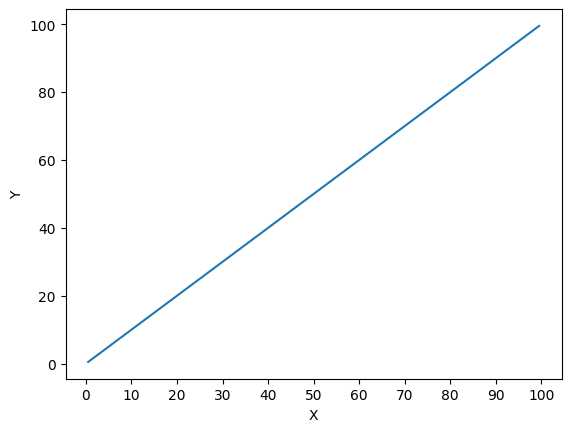

In [24]:
g = globals()
if not all(elem in g for elem in ["MakeGraphFunction"]):
  raise RuntimeError("Please Run Helper Function first")

MakeGraphFunction(lambda x: x)

#### **(b) y = x<sup>2</sup>**

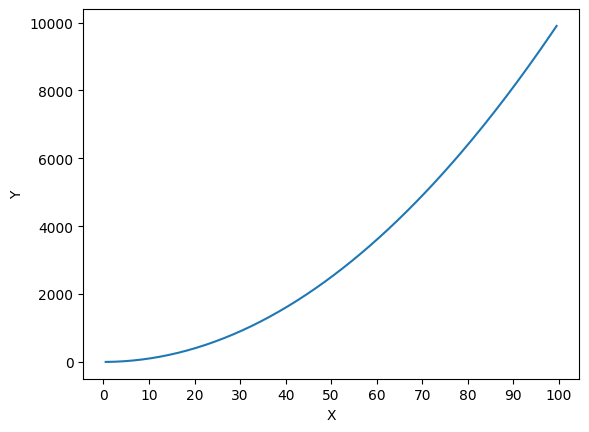

In [25]:
g = globals()
if not all(elem in g for elem in ["MakeGraphFunction"]):
  raise RuntimeError("Please Run Helper Function first")

MakeGraphFunction(lambda x: pow(x, 2))

#### **(c) y = x<sup>3</sup>/100**

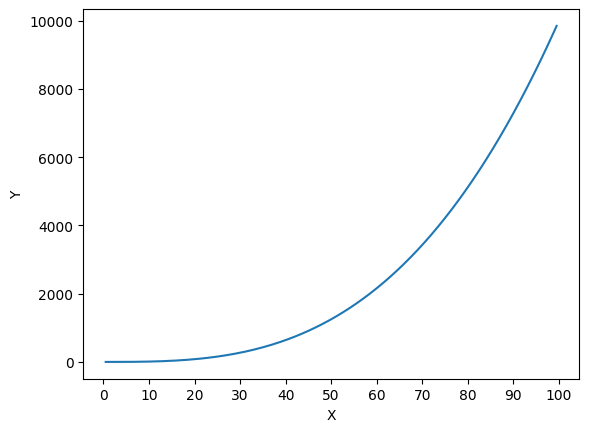

In [26]:
g = globals()
if not all(elem in g for elem in ["MakeGraphFunction"]):
  raise RuntimeError("Please Run Helper Function first")

MakeGraphFunction(lambda x: pow(x, 3)/100)

#### **(d) y = sin(x)**

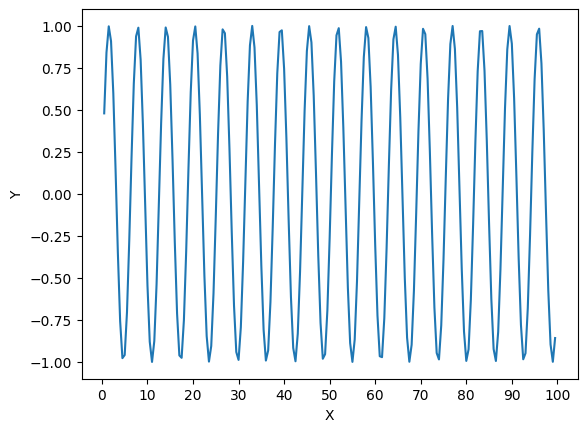

In [27]:
from numpy import sin

g = globals()
if not all(elem in g for elem in ["MakeGraphFunction"]):
  raise RuntimeError("Please Run Helper Function first")

MakeGraphFunction(lambda x: sin(x))

#### **(f) y = sin(x)/x**

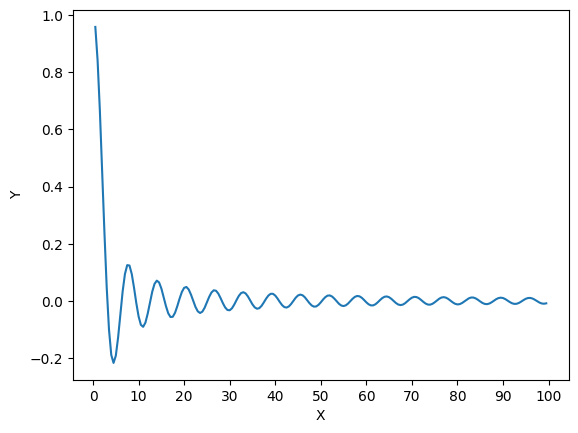

In [28]:
g = globals()
if not all(elem in g for elem in ["MakeGraphFunction"]):
  raise RuntimeError("Please Run Helper Function first")

MakeGraphFunction(lambda x: sin(x)/x)

#### **(g) y = log(x)**

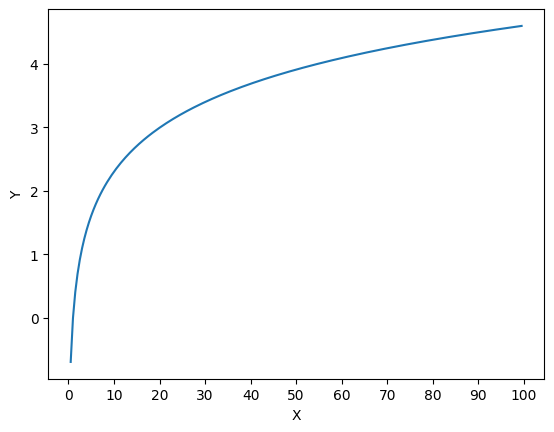

In [29]:
from numpy import log

g = globals()
if not all(elem in g for elem in ["MakeGraphFunction"]):
  raise RuntimeError("Please Run Helper Function first")

MakeGraphFunction(lambda x: log(x))

#### **(h) y = e<sup>x</sup>**

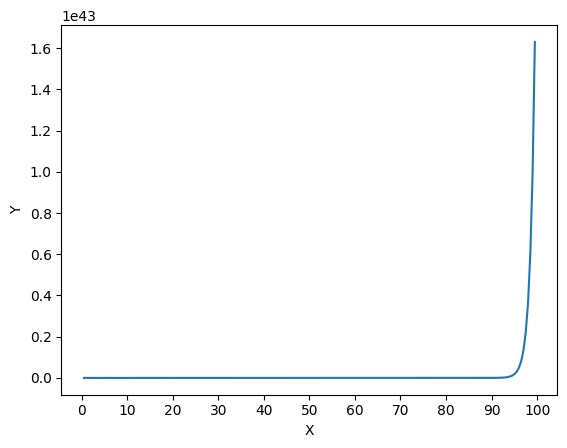

In [30]:
from numpy import e

g = globals()
if not all(elem in g for elem in ["MakeGraphFunction"]):
  raise RuntimeError("Please Run Helper Function first")

MakeGraphFunction(lambda x: pow(e, x))

# Question 10

<i>PS: The question has been broken down into 3 different cells under the same subsection</i>





#### **Numpy Random Matrix Generator**

Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2.

In [31]:
import numpy as np
import tabulate

matrixGenerated = np.random.uniform(1, 2, size=(20, 5))
constLine = "+---------+---------+---------+---------+---------+"

title = "Matrix (20, 5)"
print(title.center(len(constLine)))
print(tabulate.tabulate(matrixGenerated, tablefmt="grid"))

                   Matrix (20, 5)                  
+---------+---------+---------+---------+---------+
| 1.61851 | 1.31147 | 1.94903 | 1.93493 | 1.33307 |
+---------+---------+---------+---------+---------+
| 1.5235  | 1.98028 | 1.15264 | 1.83959 | 1.65183 |
+---------+---------+---------+---------+---------+
| 1.59465 | 1.4896  | 1.20611 | 1.64226 | 1.18247 |
+---------+---------+---------+---------+---------+
| 1.24343 | 1.14639 | 1.34313 | 1.00513 | 1.69044 |
+---------+---------+---------+---------+---------+
| 1.35521 | 1.87115 | 1.07633 | 1.25829 | 1.99647 |
+---------+---------+---------+---------+---------+
| 1.5145  | 1.28403 | 1.12755 | 1.79975 | 1.79296 |
+---------+---------+---------+---------+---------+
| 1.75349 | 1.34465 | 1.34151 | 1.79187 | 1.55326 |
+---------+---------+---------+---------+---------+
| 1.50311 | 1.69738 | 1.44093 | 1.21338 | 1.353   |
+---------+---------+---------+---------+---------+
| 1.2013  | 1.17013 | 1.3346  | 1.56472 | 1.60202 |
+---------+-

#### **DataFrame Generation**

Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”.

In [32]:
import pandas as pd

g = globals()
if not all(elem in g for elem in ["matrixGenerated"]):
  raise RuntimeError("Please Run Numpy Random Matrix Generator first")

df = pd.DataFrame(matrixGenerated, columns=["a", "b", "c", "d", "e"])
df

,a,b,c,d,e
0,1.618511,1.311468,1.949030,1.934934,1.333075
1,1.523505,1.980278,1.152637,1.839590,1.651834
2,1.594647,1.489598,1.206106,1.642256,1.182468
3,1.243430,1.146386,1.343131,1.005127,1.690443
4,1.355215,1.871147,1.076331,1.258293,1.996473
5,1.514499,1.284033,1.127550,1.799754,1.792961
6,1.753488,1.344654,1.341510,1.791866,1.553265
7,1.503110,1.697381,1.440931,1.213378,1.352995
8,1.201300,1.170130,1.334603,1.564720,1.602015
9,1.618577,1.465254,1.531185,1.963648,1.441843


#### **Analyisis**

Find the column with the highest standard deviation. Find the row with the lowest mean.

In [33]:
g = globals()
if not all(elem in g for elem in ["df"]):
  raise RuntimeError("Please Run DataFrame Generation first")

Std = df.std().idxmax()
Mean = df.mean(axis=1).idxmin()


Result = pd.DataFrame({
    "Metric": ["Standard Deviation", "Mean"],
    "Axis": ["Column", "Row"],
    "Index": [Std, Mean],
    "Value": [df[Std].std(), df.iloc[Mean, :].mean()]
})
Result

,Metric,Axis,Index,Value
0,Standard Deviation,Column,d,0.316533
1,Mean,Row,14,1.203550


# Question 11




#### **Computing Sum** (Column F)

Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”.

In [34]:
g = globals()
if not all(elem in g for elem in ["df"]):
  raise RuntimeError("Please Run DataFrame Generation first")

f = df.sum(axis=1)
df["f"] = f
df

,a,b,c,d,e,f
0,1.618511,1.311468,1.949030,1.934934,1.333075,8.147018
1,1.523505,1.980278,1.152637,1.839590,1.651834,8.147843
2,1.594647,1.489598,1.206106,1.642256,1.182468,7.115075
3,1.243430,1.146386,1.343131,1.005127,1.690443,6.428517
4,1.355215,1.871147,1.076331,1.258293,1.996473,7.557458
5,1.514499,1.284033,1.127550,1.799754,1.792961,7.518799
6,1.753488,1.344654,1.341510,1.791866,1.553265,7.784783
7,1.503110,1.697381,1.440931,1.213378,1.352995,7.207795
8,1.201300,1.170130,1.334603,1.564720,1.602015,6.872767
9,1.618577,1.465254,1.531185,1.963648,1.441843,8.020508


#### **Computing Conditional Columns** (Column G)

Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise.

In [35]:
g = globals()
if not (all(elem in g for elem in ["df"]) and "f" in df) :
  raise RuntimeError("Please Run Computing Sum (Column F) first")

g = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")
df["g"] = g
df


,a,b,c,d,e,f,g
0,1.618511,1.311468,1.949030,1.934934,1.333075,8.147018,GT8
1,1.523505,1.980278,1.152637,1.839590,1.651834,8.147843,GT8
2,1.594647,1.489598,1.206106,1.642256,1.182468,7.115075,LT8
3,1.243430,1.146386,1.343131,1.005127,1.690443,6.428517,LT8
4,1.355215,1.871147,1.076331,1.258293,1.996473,7.557458,LT8
5,1.514499,1.284033,1.127550,1.799754,1.792961,7.518799,LT8
6,1.753488,1.344654,1.341510,1.791866,1.553265,7.784783,LT8
7,1.503110,1.697381,1.440931,1.213378,1.352995,7.207795,LT8
8,1.201300,1.170130,1.334603,1.564720,1.602015,6.872767,LT8
9,1.618577,1.465254,1.531185,1.963648,1.441843,8.020508,GT8


#### **Conditional Coulmn Counting**

Find the number of rows in the dataframe where the value in the column “g” is “LT8”.

In [36]:
g = globals()
if not (all(elem in g for elem in ["df"]) and "g" in df) :
  raise RuntimeError("Please Run Computing Conditional Columns (Column G) first")

print("Number of LT8:", (df["g"] == "LT8").sum())

Number of LT8: 13


 #### **Conditional Coulmn Caluclation**

 Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [37]:
g = globals()
if not (all(elem in g for elem in ["df"]) and "g" in df) :
  raise RuntimeError("Please Run Computing Conditional Columns (Column G) first")

LT8 = df[df["g"] == "LT8"]["f"].std()
GT8 = df[df["g"] == "GT8"]["f"].std()

Result = {
    "Criteria": ["LT8", "GT8"],
    "Value": [LT8, GT8]
}
pd.DataFrame(Result)


,Criteria,Value
0,LT8,0.532966
1,GT8,0.407088


# Question 12

**Write a small piece of code to explain broadcasting in numpy.**

In [1]:
import numpy as np
import tabulate

A = np.random.randint(1, 10, size=(10, 10))
B = np.random.randint(1, 10, size=(1, 10))
C = A + B # Broadcasting

ALine = "+---+---+---+---+---+---+---+---+---+---+"
print("Matrix A (10,10)".center(len(ALine)))
print(tabulate.tabulate(A, tablefmt="grid"))
print()

print("Matrix B (1, 10)".center(len(ALine)))
print(tabulate.tabulate(B, tablefmt="grid"))
print()

ALine = "+----+----+----+----+----+---+----+----+----+----+"
print("Matrix C (10, 10)".center(len(ALine)))
print(tabulate.tabulate(C, tablefmt="grid"))

             Matrix A (10,10)            
+---+---+---+---+---+---+---+---+---+---+
| 2 | 4 | 4 | 3 | 3 | 2 | 1 | 2 | 7 | 9 |
+---+---+---+---+---+---+---+---+---+---+
| 9 | 9 | 9 | 7 | 5 | 7 | 9 | 1 | 2 | 3 |
+---+---+---+---+---+---+---+---+---+---+
| 4 | 2 | 4 | 5 | 9 | 7 | 3 | 2 | 5 | 1 |
+---+---+---+---+---+---+---+---+---+---+
| 8 | 6 | 6 | 6 | 3 | 4 | 5 | 4 | 4 | 9 |
+---+---+---+---+---+---+---+---+---+---+
| 3 | 1 | 8 | 8 | 5 | 1 | 5 | 9 | 2 | 6 |
+---+---+---+---+---+---+---+---+---+---+
| 7 | 1 | 9 | 2 | 7 | 5 | 2 | 8 | 9 | 5 |
+---+---+---+---+---+---+---+---+---+---+
| 6 | 2 | 5 | 8 | 4 | 1 | 4 | 2 | 7 | 9 |
+---+---+---+---+---+---+---+---+---+---+
| 5 | 4 | 6 | 1 | 7 | 8 | 8 | 1 | 9 | 4 |
+---+---+---+---+---+---+---+---+---+---+
| 5 | 7 | 5 | 6 | 2 | 7 | 1 | 6 | 3 | 6 |
+---+---+---+---+---+---+---+---+---+---+
| 8 | 8 | 9 | 8 | 9 | 4 | 7 | 8 | 7 | 4 |
+---+---+---+---+---+---+---+---+---+---+

             Matrix B (1, 10)            
+---+---+---+---+---+---+---+---+

Here we can see that we have been given the following

- Matrix A of size 10 x 10
- Matrix B of size 10 x 1

We have been assigned to add these matrixes using the "+" operator. However to multiply two matrices it must satisfy the following condition:
<br />

<i> Given Matrices A<sub>(i, j)</sub> and B<sub>(e, d)</sub>. The following must hold true</i>
1. i = e
2. d = j

But here we can see that
1. &nbsp;i&nbsp;&nbsp;= e
2. d != j

Hence, direct element-wise addition in our case `A + B` is not possible without **broadcasting** or reshaping.

However, due to **Numpy broadcasting**, we can still perform operations like addition or element-wise multiplication if the shapes are compatible through expansion.

Numpy will broadcast B across columns *(in our case)* or rows to match A's shape, and the operation will succeed element-wise.



# Question 13

**Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

Lets concider the following test case:

- 10 <= len(A) <= 50
- 10 <= A<sub>i</sub> <= 100




We have to find A<sub>i</sub> such that A<sub>i</Sub> <= A<sub>j</sub> ∀ A<sub>j</sub> ∈ A

In [2]:
import numpy as np
import random
import timeit
import tabulate

# Generate Random Test Case
n = random.randint(10, 50)
A = np.random.randint(10, 101, size=(n, 1))

def argmin(A):
    # A = A.tolist()
    minVal = A[0]
    minIdx = 0
    for i, x in enumerate(A):
        # print(x, min_val)
        if x < minVal:
          # print(x, min_val)
          minVal = x
          minIdx = i
    return minIdx


# Calculate Result
result_base = argmin(A)
result_bulitin = A.argmin()

# Calculate Delta
delta_base = timeit.timeit(lambda: argmin(A))
delta_bulitin = timeit.timeit(lambda: A.argmin())

# Final Table
data = [["Argmin:", result_base, result_bulitin], ["Δ Time", delta_base, delta_bulitin]]
print(tabulate.tabulate(data, tablefmt="grid", headers=["Mertic", "Base approach", "Bultin Apprach"]))



+----------+-----------------+------------------+
| Mertic   |   Base approach |   Bultin Apprach |
+==========+=================+==================+
| Argmin:  |         15      |        15        |
+----------+-----------------+------------------+
| Δ Time   |         26.3953 |         0.510787 |
+----------+-----------------+------------------+


We can see clearly see that the our function and the Builtin Function return the same value. However the builtin function is much faster than our function